In [1]:
%load_ext autoreload
%autoreload 2
from plot_11_ijshs import *


In [2]:

## extract data
stride = 1
experiments = {}
# experiments['0.3'] = extract_data_from_openfoam(pos=[0.3, 0, 0], stride=stride)
# experiments['0.4'] = extract_data_from_openfoam(pos=[0.4, 0, 0], stride=stride)
# experiments['0.5'] = extract_data_from_openfoam(pos=[0.5, 0, 0], stride=stride)
# experiments['0.75'] = extract_data_from_openfoam(pos=[0.75, 0, 0], stride=stride)
# experiments['0.9'] = extract_data_from_openfoam(pos=[0.9, 0, 0], stride=stride)
# experiments['1.5'] = extract_data_from_openfoam(pos=[1.5, 0, 0], stride=stride)
# experiments['2.2'] = extract_data_from_openfoam(pos=[2.2, 0, 0], stride=stride)

# with open('experiments_extended.pkl', 'wb')  as f:
#     pickle.dump(experiments, f)

# with open(os.path.join(main_dir, 'experiments.pkl'), 'rb')  as f:
#     experiments = pickle.load(f)

with open(os.path.join(main_dir, 'experiments_extended.pkl'), 'rb')  as f:
    experiments = pickle.load(f)

print('loaded experiments')



loaded experiments


In [3]:
# Q = np.array([experiments[k]['moments'][-1][:] for k in experiments.keys()])
# Q_steadystate = np.mean(Q, axis=0)
Q = np.array(experiments['1.5']['Q'][401][:])
# Q = np.array(experiments['0.75']['Q'][401][:])
Q_steadystate = Q
print(Q_steadystate)

[ 3.12442079e-02  6.92462672e-03 -9.19771166e-04 -9.39140783e-04
 -1.15222464e-03 -1.11106356e-03 -8.70781876e-04 -5.80037315e-04
 -2.85833009e-04 -5.78646265e-05  6.98902720e-05  1.32858117e-04
  8.54946367e-05  1.07281229e-04 -1.52491773e-05  1.28418478e-04
 -7.46645812e-05  2.68999574e-04 -1.21305906e-04  4.87337615e-04
 -2.44498641e-04  7.13421132e-04]


In [34]:

### simulation

data_inflow = {'h': experiments['0.5']['h'], 'moments': experiments['0.5']['moments'], 'timeline': experiments['0.5']['timeline']}
model_0, settings_0, mesh_0 = setup_smm(data_inflow, 0, dir='lvl0', name='chezy10', Q_steadystate=Q_steadystate)
model_1, settings_1, mesh_1 = setup_smm(data_inflow, 1, dir='lvl1', name='chezy10', Q_steadystate=Q_steadystate)
model_2, settings_2, mesh_2 = setup_smm(data_inflow, 2, dir='lvl2', name='chezy10', Q_steadystate=Q_steadystate)
# model_3, settings_3, mesh_3 = setup_smm(data_inflow, 3, dir='lvl3', name='chezy10', Q_steadystate=Q_steadystate)
model_4, settings_4, mesh_4 = setup_smm(data_inflow, 4, dir='lvl4', name='chezy10', Q_steadystate=Q_steadystate)
# model_5, settings_5, mesh_5 = setup_smm(data_inflow, 5, dir='lvl5', name='chezy10', Q_steadystate=Q_steadystate)
model_6, settings_6, mesh_6 = setup_smm(data_inflow, 6, dir='lvl6', name='chezy10', Q_steadystate=Q_steadystate)
model_8, settings_8, mesh_8 = setup_smm(data_inflow, 8, dir='lvl8', name='chezy10', Q_steadystate=Q_steadystate)

In [8]:
model_0.sympy_source

Matrix([
[                    1.0e-20*q0],
[-1.0*C*q1*Abs(q1)/(q0*Abs(q0))]])

In [6]:
# def eval_source(Q, A, model=model_1, settings=settings_1):
#     nu = settings.parameteres['nu']
#     result = np.zeros_like(Q)
#     result = model.sympy_source
#     for k, v in settings.parameters:
#         result = result.subs(k, v)
#     for k, v in zip(model.variables.get_list(), list(Q)):
#         result = model.sympy_source.eval(k, v)
#     return result
    

In [7]:
# from scipy.optimize import curve_fit

# # Define the non-linear function
# def func(q):
#     r = np.zeros_like(q)
#     S = model_1.sympy_source
#     return a * np.exp(-b * x) + c

# # Generate some data
# xdata = np.linspace(0, 4, 50)
# ydata = func(xdata, 2.5, 1.3, 0.5) + 0.2 * np.random.normal(size=len(xdata))

# # Fit the function to the data
# popt, pcov = curve_fit(func, xdata, ydata)

# # popt contains the optimized parameters
# print(popt)

In [8]:
model_4.parameters

IterableNamespace(iterable_obj=[g, ex, ez, C, nu, rho, lamda, beta, A, S, Q_ss0, Q_ss1, Q_ss2, Q_ss3, Q_ss4, Q_ss5, Q_ss6, Q_ss7, Q_ss8, Q_ss9, Q_ss10, Q_ss11, Q_ss12, Q_ss13, Q_ss14, Q_ss15, Q_ss16, Q_ss17, Q_ss18, Q_ss19, Q_ss20, Q_ss21, ns_1, ns_2])

In [79]:
i = 0
for (model, settings, mesh) in zip([model_0, model_1, model_2, model_4, model_6, model_8], [settings_0, settings_1, settings_2, settings_4, settings_6, settings_8], [mesh_0, mesh_1, mesh_2, mesh_4, mesh_6, mesh_8]) :
# for (model, settings, mesh) in zip([model_8, model_0], [settings_8, settings_0], [mesh_8, mesh_0]) :
# for (model, settings, mesh) in zip([model_4, model_0], [settings_4, settings_0], [mesh_4, mesh_0]) :
# for (model, settings, mesh) in zip([model_0], [settings_0], [mesh_0]) :
# for (model, settings, mesh) in zip([model_2, model_4, model_6, model_8], [settings_2, settings_4, settings_6, settings_8], [mesh_2, mesh_4, mesh_6, mesh_8]) :
# for (model, settings, mesh) in zip([model_6, model_4, model_2, model_1, model_0], [settings_6, settings_4, settings_2, settings_1, settings_0], [mesh_6, mesh_4, mesh_2,  mesh_1, mesh_0]) :
# for (model, settings, mesh) in zip([model_8, model_6, model_4, model_2, model_1, model_0], [settings_8, settings_6, settings_4, settings_2, settings_1, settings_0], [mesh_8,mesh_6, mesh_4, mesh_2,  mesh_1, mesh_0]) :
# for (model, settings, mesh) in zip([model_2], [settings_2], [mesh_2]) :
# for (model, settings, mesh) in zip([model_4], [settings_4], [mesh_4]) :
# for (model, settings, mesh) in zip([model_1, model_2, model_3, model_4, model_5], [settings_1, settings_2, settings_3, settings_4, settings_5], [mesh_1, mesh_2, mesh_3, mesh_4, mesh_5]) :
# for (model, settings, mesh) in zip([model_2], [settings_2], [mesh_2]) :
    print(f'MODEL {i}')
    i += 1
    #nu
    model.parameter_values[4] =  1.034*10**(-6)
    #beta
    # model.parameter_values[7] =0.00000000000001
    model.parameter_values[7] =0.0000
    #C
    # model.parameter_values[3] = -1/900.
    # model.parameter_values[3] = 1/900.
    # model.parameter_values[3] = -1/40.
    # model.parameter_values[3] = 1/4.
    if i == 1:
        model.parameter_values[3] = 1/(20**2)
        # model.parameter_values[3] = 0.
        model.parameter_values[-2] = 0.
        model.parameter_values[-1] = 0.0
    else:
        model.parameter_values[3] = 1/(20**2)
        #ns1 ns2
        model.parameter_values[-2] = 0.0
        model.parameter_values[-1] = 0.1
    
    #rho
    model.parameter_values[5] =  1.
    #lambda
    model.parameter_values[6] = 2000.

    #A, S
    model.parameter_values[8] = 0.0
    model.parameter_values[9] = 0.0000

    
    settings.time_end=5.
    run_smm(mesh, model, settings)


MODEL 0


1 0.01684649038058935 0.01684649038058935
2 0.033692949798299815 0.01684645941771046
3 0.05053941231231954 0.01684646251401972
4 0.0673858776130481 0.016846465300728565
5 0.08423234542180476 0.016846467808756663
6 0.10107881548777872 0.01684647006597397
7 0.1179252872107667 0.01684647172298797
8 0.1347717595806344 0.016846472369867697
9 0.15161823247175413 0.016846472891119745
10 0.16846468980959065 0.01684645733783652
11 0.18531114447761216 0.01684645466802152
12 0.20215756722927047 0.016846422751658312
13 0.21900397935453986 0.016846412125269376
14 0.23585031681963653 0.01684633746509666
15 0.2526965840132482 0.016846267193611677
16 0.2695427180763189 0.016846134063070756
17 0.28638864798454167 0.016845929908222784
18 0.3032342480385748 0.01684560005403315
19 0.3200793663620168 0.016845118323442005
20 0.3369236947854081 0.01684432842339134
21 0.3537668936277446 0.01684319884233649
22 0.3706082629463732 0.016841369318628622
23 0.38744706444842436 0.01683880150205111
24 0.4042821309840

In [80]:



# # ### align of and smm datag
simulations = {}
def load_and_align(pos, simulations):
    # new = load_and_align_smm_with_of(os.path.join('outputs/lvl0', "chezy10.h5" ), pos, experiments)
    lvl0 = load_and_align_smm_with_of(os.path.join('outputs/lvl0', "chezy10.h5" ), pos, experiments)
    lvl1 = load_and_align_smm_with_of(os.path.join('outputs/lvl1', "chezy10.h5" ), pos, experiments)
    lvl2 = load_and_align_smm_with_of(os.path.join('outputs/lvl2', "chezy10.h5" ), pos, experiments)
    lvl4 = load_and_align_smm_with_of(os.path.join('outputs/lvl4', "chezy10.h5" ), pos, experiments)
    lvl6 = load_and_align_smm_with_of(os.path.join('outputs/lvl6', "chezy10.h5" ), pos, experiments)
    lvl8 = load_and_align_smm_with_of(os.path.join('outputs/lvl8', "chezy10.h5" ), pos, experiments)
    simulations[str(pos)] = {'0': lvl0, '1': lvl1, '2': lvl2, '4': lvl4, '6': lvl6, '8': lvl8} 
    # simulations[str(pos)] = {'0': lvl0, '1': lvl1, '2': lvl2, '4': lvl4, '6': lvl6} 
    # simulations[str(pos)] = {'0': lvl0} 
    # simulations[str(pos)] = {'0': lvl0, '8': lvl8} 
    # simulations[str(pos)] = {'0': lvl0, '4': lvl4} 
    return simulations

# # simulations = load_and_align(0.3, simulations)
# # simulations = load_and_align(0.4, simulations)
simulations = load_and_align(0.5, simulations)
simulations = load_and_align(0.75, simulations)
simulations = load_and_align(0.9, simulations)
simulations = load_and_align(1.5, simulations)
simulations = load_and_align(2.2, simulations)


# with open('simulations_extended.pkl', 'wb')  as f:
#     pickle.dump(simulations, f)


# with open(os.path.join(main_dir, 'simulations_extended.pkl'), 'rb')  as f:
#     simulations = pickle.load(f)

print('loaded simulations')



loaded simulations


In [12]:
### velocity profiles
# fig, ax = plt.subplots(1, 3, constrained_layout=True, figsize=(12,7.5))
# fig.suptitle(f'velocity profiles at x = {0.3} m')
# ax = plot_velocity_profiles_at_position(ax, directory, experiments['0.3'], regions=[80, 300, 400, 1000], stride=30) 
# fig.savefig(os.path.join(main_dir, 'docs/problems/images_new/vp03.png'))


In [13]:

# fig, ax = plt.subplots(1, 3, constrained_layout=True, figsize=(12,7.5))
# fig.suptitle(f'velocity profiles at x = {0.4} m')
# ax = plot_velocity_profiles_at_position(ax, directory, experiments['0.4'], regions=[80, 300, 390, 1000], stride=30) 
# fig.savefig(os.path.join(main_dir, 'docs/problems/images_new/vp04.png'))


In [14]:

# fig, ax = plt.subplots(1, 3, constrained_layout=True, figsize=(12,7.5))
# fig.suptitle(f'velocity profiles at x = {0.5} m')
# ax = plot_velocity_profiles_at_position(ax, directory, experiments['0.5'], regions=[80, 250, 400, 1000], stride=30) 


In [15]:

# fig, ax = plt.subplots(2, 3, constrained_layout=True, figsize=(12,7.5))
# # fig.suptitle(f'velocity profiles at x = {0.5} m')
# ax[0] = plot_velocity_profiles_at_position(ax[0], directory, experiments['0.3'], regions=[0, 45, 90, 400], stride=10) 
# ax[1] = plot_velocity_profiles_at_position(ax[1], directory, experiments['0.5'], regions=[45, 90, 135, 400], stride=10) 
# ax[0][0].set_xlim(0, 4)
# ax[1][0].set_xlim(0, 4)
# # fig.suptitle(f'velocity profiles at x = {0.3} m')
# # fig.savefig(os.path.join(main_dir, 'docs/problems/images_new/vp03.png'))
# # ax[0][0].get_shared_x_axes().join(ax[0][0], ax[0][1])
# # ax[0, 0].get_shared_x_axes().join(ax[0, 0], ax[0, 1])
# ax[0][0].set_xlabel(None)
# ax[0][1].set_xlabel(None)
# ax[0][2].set_xlabel(None)
# ax[1][0].set_xlabel(r'time $t[s]$')
# ax[1][1].set_xlabel(r'x-vel. $u [m/s]$')
# ax[1][2].set_xlabel(r'z-vel. $w [m/s]$')
# ax[0][0].set_ylabel(r'water height $h[m]$')
# ax[1][0].set_ylabel(r'water height $h[m]$')
# ax[0][1].set_ylabel(r'$z/h [-]$')
# ax[1][1].set_ylabel(r'$z/h [-]$')
# ax[0][2].set_ylabel(r'$z/h [-]$')
# ax[1][2].set_ylabel(r'$z/h [-]$')
# ax[0][0].grid(True)
# ax[1][0].grid(True)
# ax[0][1].grid(True)
# ax[1][1].grid(True)
# ax[0][2].grid(True)
# ax[1][2].grid(True)
# fig.savefig(os.path.join(main_dir, 'docs/problems/images_new/interface_position.png'))

In [16]:
# fig, ax = plt.subplots(1, 3, constrained_layout=True, figsize=(12,7.5))
# fig.suptitle(f'velocity profiles at x = {0.75} m')
# ax = plot_velocity_profiles_at_position(ax, directory, experiments['0.75'], regions=[130, 200, 300, 400], stride=30) 
# fig.savefig(os.path.join(main_dir, 'docs/problems/images_new/vp75.png'))


In [17]:
# fig, ax = plt.subplots(1, 3, constrained_layout=True, figsize=(12,7.5))
# fig.suptitle(f'velocity profiles at x = {0.9} m')
# ax = plot_velocity_profiles_at_position(ax, directory, experiments['0.9'], regions=[100, 250, 460, 1000], stride=30) 
# fig.savefig(os.path.join(main_dir, 'docs/problems/images_new/vp90.png'))


In [18]:
errors = {}
errors['0.5'] = {}
errors['0.75'] = {}
errors['0.9'] = {}
errors['1.5'] = {}
errors['2.2'] = {}

errors: [0.0002062310364275739, 0.00018435299396621217, 0.00013958583568146528, 6.432031093825322e-05, 5.439996490231204e-05, 4.7746189272324776e-05, 3.332594494899026e-05, 1.987485709386935e-05, 1.0168809498252797e-05]
relative errors: [1.0, 1.118674733676262, 1.4774495952310869, 3.2063128025850713, 3.7910141449155406, 4.319319291667786, 6.188302739599361, 10.37647895798901, 20.280745397286523]


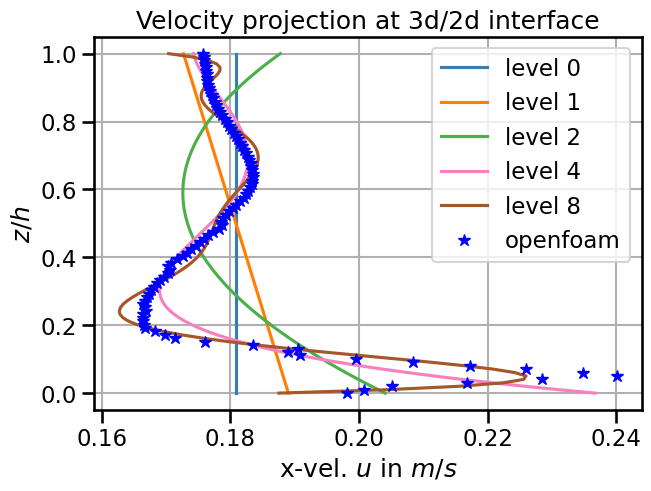

In [19]:
# ### reconstructions

fig, ax = plt.subplots(constrained_layout=True)
time = 1.0
ax, u, z = plot_reconstructed_VP(ax, experiments['0.5'], time, levels=[0, 1, 2, 4, 8])
reconstructions, error, rel_error = reconstruct_velocity_profiles_OF(8, u, z)
errors['0.5'][str(time)] = error
ax.set_xlabel(r'x-vel. $u$ in $m/s$')
ax.set_ylabel(r'$z/h$')
ax.grid(True)
# ax.plot(u, z, '*', label='openfoam')
# fig.savefig(os.path.join(main_dir, 'docs/problems/images/projectioninflow03.png'))
fig.savefig(os.path.join(main_dir, 'docs/problems/images_new/reconstruction_interface.png'))


In [20]:

# fig, ax = plt.subplots()
# time = 2.0
# ax, u, z = plot_reconstructed_VP(ax, experiments['0.5'], time, levels=[0, 1, 2, 4, 8])
# reconstructions, error, rel_error = reconstruct_velocity_profiles_OF(8, u, z)
# errors['0.5'][str(time)] = error
# fig.savefig(os.path.join(main_dir, 'docs/problems/images_new/recon_05_20.png'))


In [21]:

# fig, ax = plt.subplots()
# time = 3.0
# ax, u, z = plot_reconstructed_VP(ax, experiments['0.5'], time, levels=[0, 1, 2, 4, 8])
# fig.savefig(os.path.join(main_dir, 'docs/problems/images_new/recon_05_30.png'))



In [92]:

def plot_VP(ax, pos=0.75, time=5.0, lvls=[1,2,3,4,5]):
    timeline_OF = experiments[f'{pos}']['timeline']
    # time = timeline_OF[-1]
    z = np.linspace(0, 1, 100)
    it_OF = ((timeline_OF-time)**2).argmin()
    u_OF = experiments[f'{pos}']['u'][it_OF]
    Q_OF = experiments[f'{pos}']['Q']
    Q_OF = Q_OF[it_OF]
    h_OF = Q_OF[0]
    moments_OF = Q_OF[1:] / h_OF

    ax.plot(u_OF, z, 'b*', label='openfoam')
    # ax.plot(u_OF.mean()*np.ones_like(u_OF), z, 'b*', label='of_mean')

    def plot_and_compute_error(lvl):
        timeline = simulations[f'{pos}'][f'{lvl}']['timeline']
        Q = simulations[f'{pos}'][f'{lvl}']['Q']
        it = ((timeline-time)**2).argmin()
        Q_sim = np.array(Q[it])
        h = Q[it][0]
        moments = Q[it][1:] / h
        u_smm = reconstruct_velocity_profile_SMM(moments)
        u_OF_bestapprox = reconstruct_velocity_profile_SMM(moments_OF[:1+lvl])
        ax.plot(u_smm, z,  label=f'lvl{lvl}')
        # ax.plot(u_smm.mean() * np.ones_like(z), z,  label=f'lvl{lvl}_mean')
        # ax.plot(moments[0] * np.ones_like(z), z,  label=f'lvl{lvl}_mean')
        # mean_of = u_OF[it_OF].mean()
        # mean_SMM = u_smm.mean()
        error = (np.trapz(np.abs(u_OF - u_smm), z))
        
        error_bestapprox = (np.trapz(np.abs(u_smm - u_OF_bestapprox), z))
        # error_wo_mean = np.trapz((u_OF[it_OF]-mean_of - (u_smm-mean_SMM))**2, z)
        print(f'lvl{lvl}', error)
        # print(f'lvl{lvl}', error_bestapprox)
        # print(f'lvl{lvl}', error, error_wo_mean)
        # print(f'mean OF: {mean_of} -- mean SMM: {mean_SMM}')

    for lvl in lvls:
        plot_and_compute_error(lvl)

    # ax.set_xlabel('$u$')
    # ax.set_ylabel('$z$')
    # plt.suptitle(f"velocity profile at t={time}, x={pos}")
    ax.set_xlabel(r'x-vel. $u$ in $m/s$')
    ax.set_ylabel(r'$z/h$')
    plt.legend()


lvl0 0.018252859347307575
lvl1 0.017458434958903417
lvl2 0.012232051423851652
lvl4 0.0034486925210891746
lvl6 0.0012496246431832443
lvl8 0.0012297485272133874


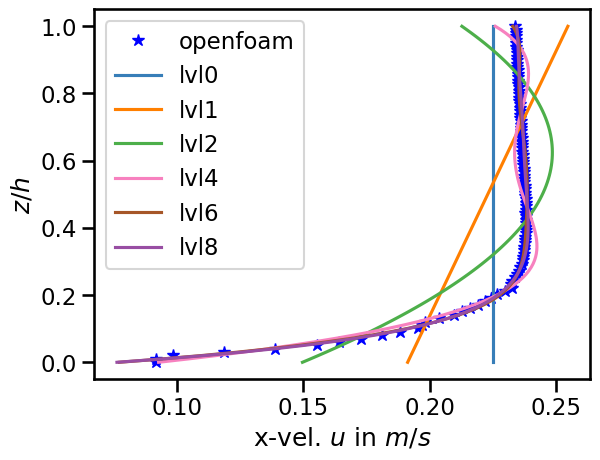

In [93]:
fig, ax = plt.subplots()
plot_VP(ax, pos=0.5, lvls=[0, 1, 2, 4, 6, 8], time=4.0)
# plot_VP(ax, pos=0.5, lvls=[0, 1, 2, 4, 6], time=4.0)
# plot_VP(ax, pos=0.5, lvls=[0, 8,], time=4.0)
# plot_VP(ax, pos=0.5, lvls=[0, 4,], time=4.0)
# plot_VP(ax, pos=0.5, lvls=[0], time=4.0)

lvl0 0.023516804486339107
lvl1 0.035733596017036615
lvl2 0.02771223143630902
lvl4 0.008559942182773552
lvl6 0.00501834980284402
lvl8 0.0036889473123561975


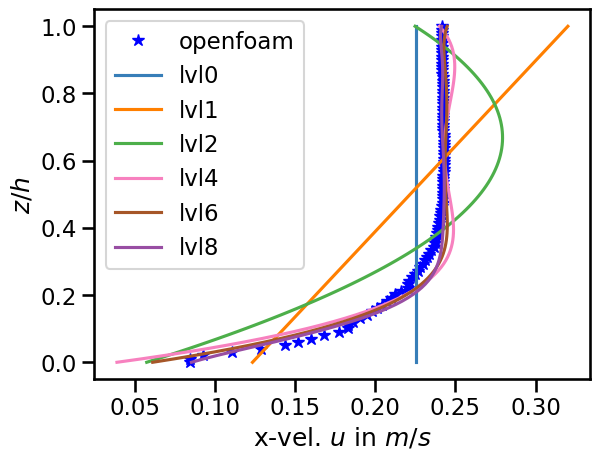

In [94]:
fig, ax = plt.subplots()
plot_VP(ax, pos=0.75, lvls=[0, 1, 2, 4, 6, 8], time=4.0)
# plot_VP(ax, pos=0.75, lvls=[0, 8], time=4.0)
# plot_VP(ax, pos=0.75, lvls=[0, 4], time=4.0)

lvl0 0.027849502987588426
lvl1 0.043275102594568654
lvl2 0.028416770680291307
lvl4 0.007632634650265285
lvl6 0.007051083277375988
lvl8 0.009919662434122045


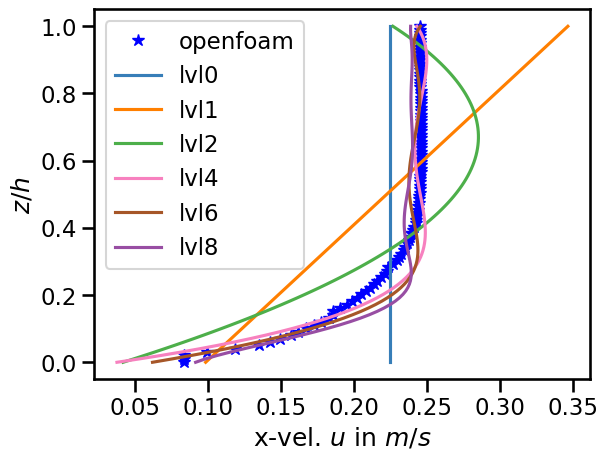

In [95]:
fig, ax = plt.subplots()
plot_VP(ax, pos=0.9, lvls=[0, 1, 2, 4, 6, 8], time=4.0)
# plot_VP(ax, pos=0.9, lvls=[0, 8], time=5.0)
# plot_VP(ax, pos=0.9, lvls=[0, 4], time=5.0)

lvl0 0.01554134116052764
lvl1 0.05738828770841085
lvl2 0.03732263895120879
lvl4 0.014960778512518508
lvl6 0.010645239849143853
lvl8 0.0074148941996917935


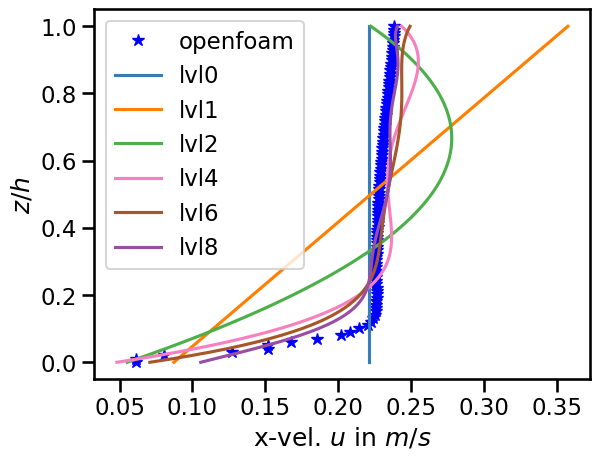

In [96]:

fig, ax = plt.subplots()
plot_VP(ax, pos=1.5, lvls=[0, 1, 2, 4, 6, 8], time=4.0)
# plot_VP(ax, pos=1.5, lvls=[0, 8], time=4.0)
# plot_VP(ax, pos=1.5, lvls=[0, 4], time=4.0)

lvl0 0.014611874919034163
lvl1 0.01883222875030243
lvl2 0.024068181240581844
lvl4 0.015054130997944993
lvl6 0.012628845708580062
lvl8 0.012619960158440701


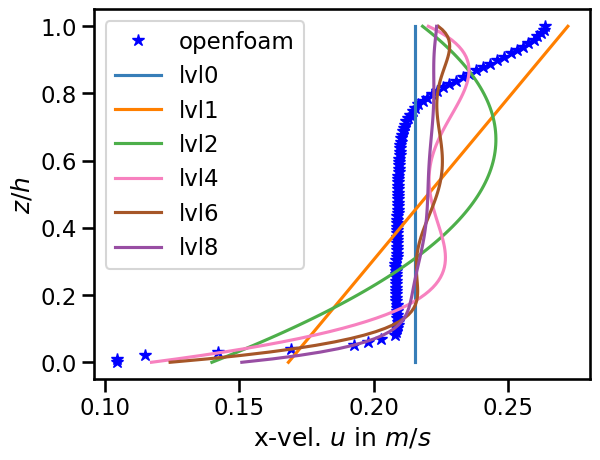

In [97]:

fig, ax = plt.subplots()
plot_VP(ax, pos=2.2, lvls=[0, 1, 2, 4, 6, 8], time=4.0)
# plot_VP(ax, pos=2.2, lvls=[0, 8], time=4.0)
# plot_VP(ax, pos=2.2, lvls=[0, 4], time=4.0)
# plot_VP(ax, pos=2.2, lvls=[0], time=4.0)

lvl0 0.025804285299307356
lvl1 0.044230773586328376
lvl2 0.03255299155709766
lvl4 0.01040005428323244
lvl6 0.008460286184979744
lvl8 0.005474942971719118


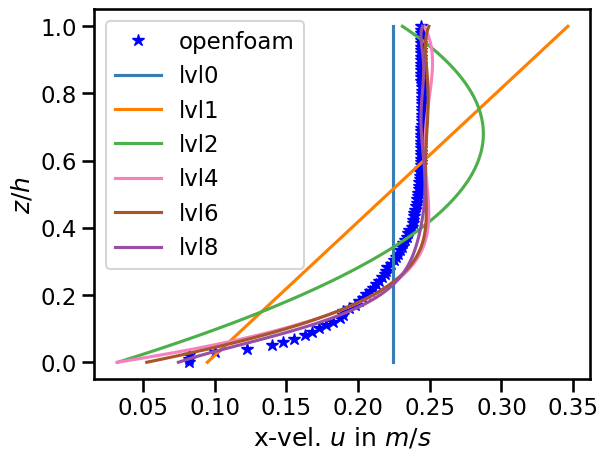

In [98]:
fig, ax = plt.subplots()
plot_VP(ax, pos=0.9, lvls=[0, 1, 2, 4, 6, 8])

lvl0 0.01554134116052764
lvl1 0.05738828770841085
lvl2 0.03732263895120879
lvl4 0.014960778512518508
lvl6 0.010645239849143853
lvl8 0.0074148941996917935


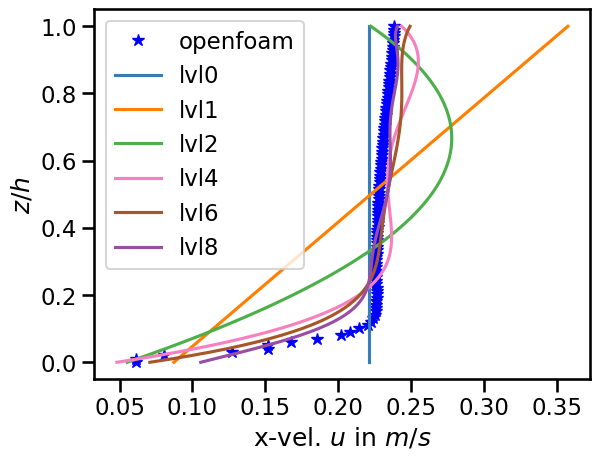

In [99]:
fig, ax = plt.subplots()
plot_VP(ax, pos=1.5, lvls=[0, 1, 2, 4, 6, 8], time=4.)

lvl0 0.014611874919034163
lvl1 0.01883222875030243
lvl2 0.024068181240581844
lvl4 0.015054130997944993
lvl6 0.012628845708580062
lvl8 0.012619960158440701


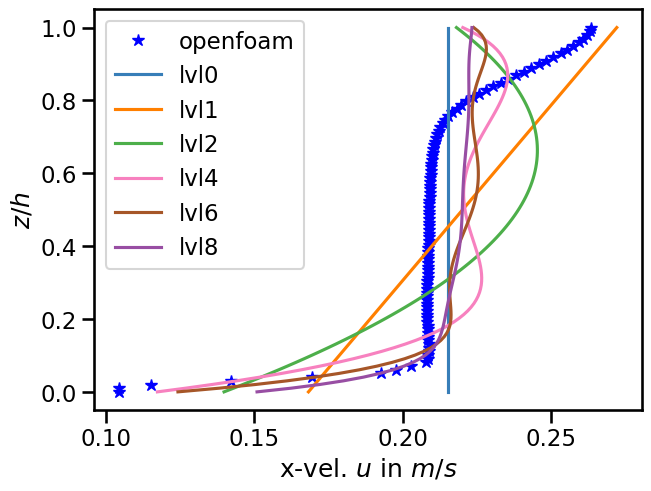

In [100]:
fig, ax = plt.subplots(constrained_layout=True)
plot_VP(ax, pos=2.2, lvls=[0, 1, 2, 4, 6, 8], time=4.)

lvl0 0.027849502987588426
lvl1 0.043275102594568654
lvl2 0.028416770680291307
lvl4 0.007632634650265285
lvl6 0.007051083277375988
lvl8 0.009919662434122045
lvl0 0.01554134116052764
lvl1 0.05738828770841085
lvl2 0.03732263895120879


/tmp/ipykernel_21248/3474211552.py:46: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


lvl4 0.014960778512518508
lvl6 0.010645239849143853
lvl8 0.0074148941996917935


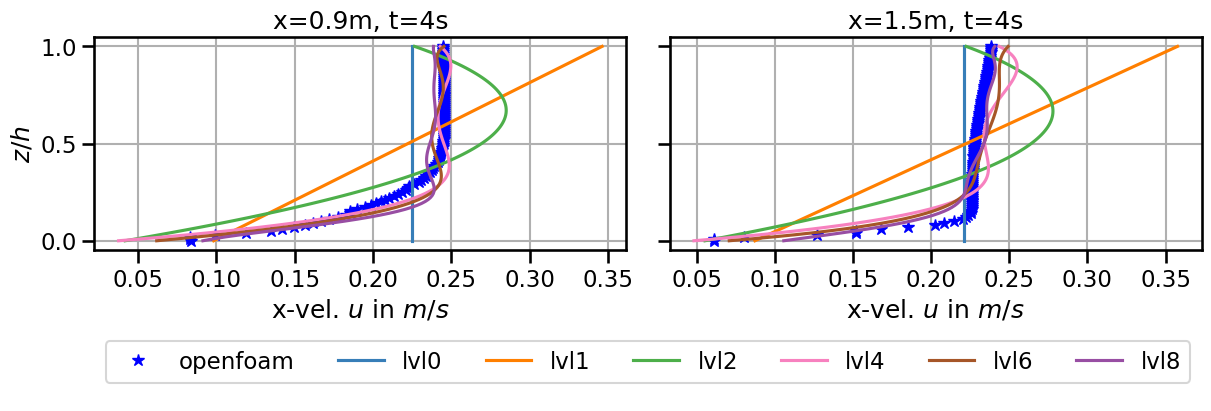

In [132]:
fig = plt.figure(constrained_layout=True, figsize=(12, 4))
ax = fig.subplot_mosaic([[0, 1],['legend', 'legend']], height_ratios = [3.,1.])
plot_VP(ax[0], pos=0.9, lvls=[0, 1, 2, 4, 6, 8], time=4.0)
plot_VP(ax[1], pos=1.5, lvls=[0, 1, 2, 4, 6, 8], time=4.0)

ax[0].grid(True)
ax[1].grid(True)
ax[0].set_title(f"x={0.9}m, t={4}s")
ax[1].set_title(f"x={1.5}m, t={4}s")
ax[1].set_ylabel('')
ax["legend"].axis("off")

# ax[1].sharex(ax[3])
# ax[0].sharex(ax[2])
ax[1].set_yticklabels([])
# ax[3].set_yticklabels([])

handles, labels = ax[0].get_legend_handles_labels()
ax["legend"].legend(handles, labels, ncol=7, mode="expand")
# ax["legend"].get_legend().set_title("level")
fig.savefig(os.path.join(main_dir, 'docs/problems/images_new/velocity_profiles.png'))


lvl0 0.027849502987588426
lvl1 0.043275102594568654
lvl2 0.028416770680291307
lvl4 0.007632634650265285
lvl6 0.007051083277375988
lvl8 0.009919662434122045
lvl0 0.01554134116052764
lvl1 0.05738828770841085
lvl2 0.03732263895120879
lvl4 0.014960778512518508


/tmp/ipykernel_21248/3474211552.py:46: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


lvl6 0.010645239849143853
lvl8 0.0074148941996917935


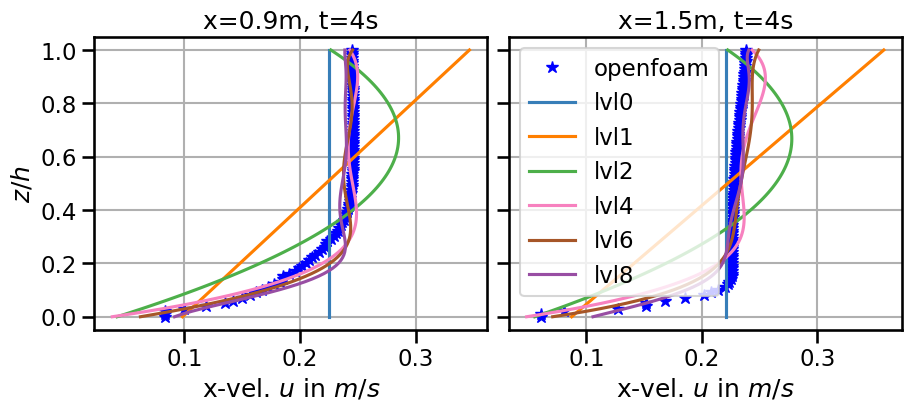

In [101]:
# fig, ax = plt.subplots(1, 2, constrained_layout=True, figsize=(9, 4), sharey=True)
# plot_VP(ax[0], pos=0.9, lvls=[0, 1, 2, 4, 6, 8], time=4.0)
# # plot_VP(ax[0], pos=0.75, lvls=[0, 8], time=4.0)
# # plot_VP(ax[0], pos=0.75, lvls=[0, 4], time=4.0)
# # plot_VP(ax[1], pos=1.5, lvls=[0, 2, 4, 8], time=3.0)
# plot_VP(ax[1], pos=1.5, lvls=[0, 1, 2, 4, 6, 8], time=4.0)
# # plot_VP(ax[1], pos=1.5, lvls=[0, 8], time=4.0)
# # plot_VP(ax[1], pos=1.5, lvls=[0, 4], time=4.0)
# ax[0].grid(True)
# ax[1].grid(True)
# ax[0].set_title(f"x={0.9}m, t={4}s")
# ax[1].set_title(f"x={1.5}m, t={4}s")
# # ax[0].legend()
# ax[1].legend()
# # ax[1].legend_.remove()
# ax[1].set_ylabel('')
# fig.savefig(os.path.join(main_dir, 'docs/problems/images_new/velocity_profiles.png'))


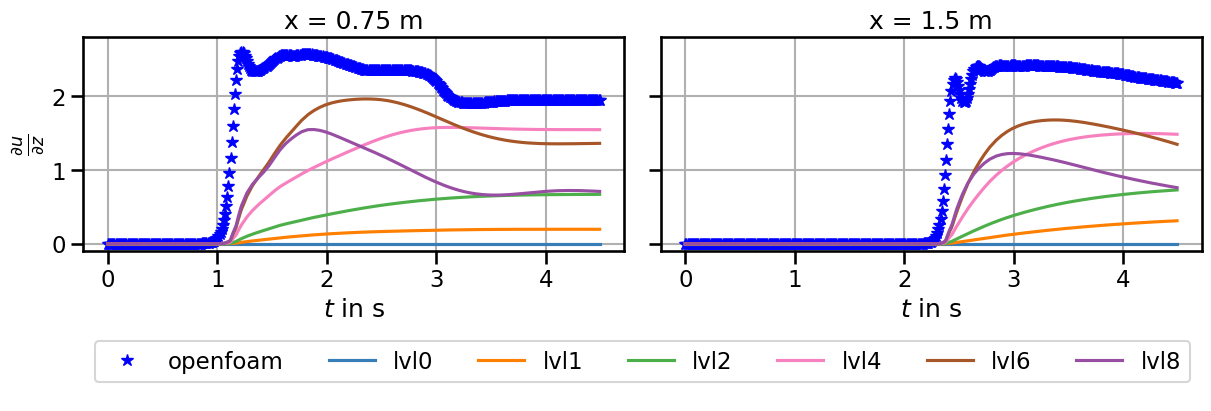

In [134]:
fig = plt.figure(constrained_layout=True, figsize=(12, 4))
ax = fig.subplot_mosaic([[0, 1],['legend', 'legend']], height_ratios = [3.,1.])
z = np.linspace(0, 1, 100)

def plot_shear(ax, pos, time_end=4.5):
    i_time_0 = ((simulations[f'{pos}']['0']['timeline']-time_end)**2).argmin()
    i_time_1 = ((simulations[f'{pos}']['1']['timeline']-time_end)**2).argmin()
    i_time_2 = ((simulations[f'{pos}']['2']['timeline']-time_end)**2).argmin()
    i_time_4 = ((simulations[f'{pos}']['4']['timeline']-time_end)**2).argmin()
    i_time_6 = ((simulations[f'{pos}']['6']['timeline']-time_end)**2).argmin()
    i_time_8 = ((simulations[f'{pos}']['8']['timeline']-time_end)**2).argmin()
    i_time_of = ((experiments[f'{pos}']['timeline']-time_end)**2).argmin()
    # ax.plot(experiments[f'{pos}']['timeline'][:i_time_of], experiments[f'{pos}']['shear'][:i_time_of], 'b*', label='openfoam')
    ax.plot(experiments[f'{pos}']['timeline'][:i_time_of], experiments[f'{pos}']['u'][:i_time_of, 9]/z[9], 'b*', label='openfoam')
    ax.plot(simulations[f'{pos}']['0']['timeline'][:i_time_0], simulations[f'{pos}']['0']['shear'][:i_time_0], label='lvl0')
    ax.plot(simulations[f'{pos}']['1']['timeline'][:i_time_1], simulations[f'{pos}']['1']['shear'][:i_time_1], label='lvl1')
    ax.plot(simulations[f'{pos}']['2']['timeline'][:i_time_2], simulations[f'{pos}']['2']['shear'][:i_time_2], label='lvl2')
    ax.plot(simulations[f'{pos}']['4']['timeline'][:i_time_4], simulations[f'{pos}']['4']['shear'][:i_time_4], label='lvl4')
    ax.plot(simulations[f'{pos}']['6']['timeline'][:i_time_6], simulations[f'{pos}']['6']['shear'][:i_time_6], label='lvl6')
    ax.plot(simulations[f'{pos}']['8']['timeline'][:i_time_8], simulations[f'{pos}']['8']['shear'][:i_time_8], label='lvl8')
    ax.set_title(f"x = {pos} m")
    ax.grid(True)
    # plt.legend()
    ax.set_xlabel('$t$ in s')

ax[0].set_ylabel('$ \\frac{\partial u}{\partial z} $')
plot_shear(ax[0], 0.75)
plot_shear(ax[1], 1.5)

# ax[1].legend()

ax[0].grid(True)
ax[1].grid(True)
# ax[0].set_title(f"x={0.9}m, t={4}s")
# ax[1].set_title(f"x={1.5}m, t={4}s")
# ax[1].set_ylabel('')
ax["legend"].axis("off")

# ax[1].sharex(ax[3])
# ax[0].sharey(ax[1])
ax[1].set_yticklabels([])
# ax[3].set_yticklabels([])
ax[0].set_ylim(-0.1, 2.8)
ax[1].set_ylim(-0.1, 2.8)

handles, labels = ax[0].get_legend_handles_labels()
ax["legend"].legend(handles, labels, ncol=7, mode="expand")
# ax["legend"].get_legend().set_title("level")
# fig.savefig(os.path.join(main_dir, 'docs/problems/images_new/shear_comparison.png'))


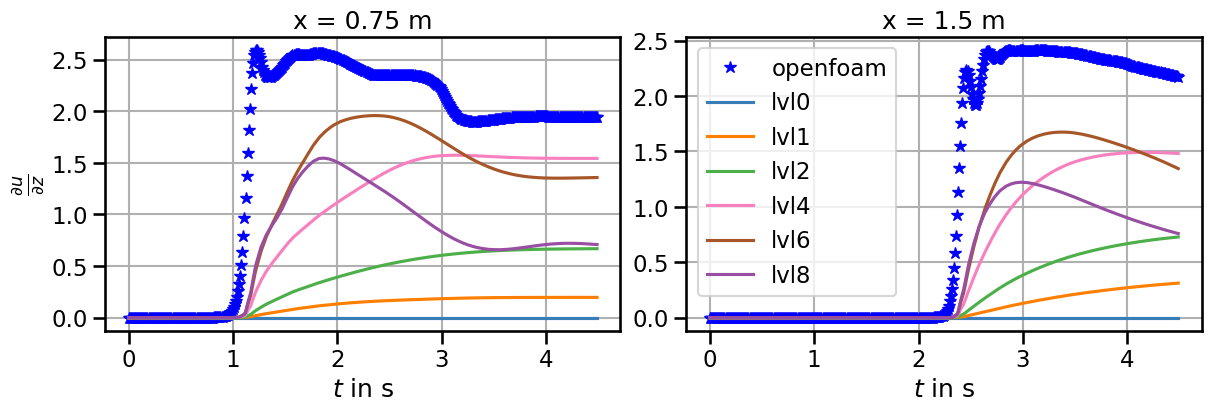

In [104]:

# # ### shear plot
# pos = 1.5
# fig, ax = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
# z = np.linspace(0, 1, 100)

# def plot_shear(ax, pos, time_end=4.5):
#     i_time_0 = ((simulations[f'{pos}']['0']['timeline']-time_end)**2).argmin()
#     i_time_1 = ((simulations[f'{pos}']['1']['timeline']-time_end)**2).argmin()
#     i_time_2 = ((simulations[f'{pos}']['2']['timeline']-time_end)**2).argmin()
#     i_time_4 = ((simulations[f'{pos}']['4']['timeline']-time_end)**2).argmin()
#     i_time_6 = ((simulations[f'{pos}']['6']['timeline']-time_end)**2).argmin()
#     i_time_8 = ((simulations[f'{pos}']['8']['timeline']-time_end)**2).argmin()
#     i_time_of = ((experiments[f'{pos}']['timeline']-time_end)**2).argmin()
#     # ax.plot(experiments[f'{pos}']['timeline'][:i_time_of], experiments[f'{pos}']['shear'][:i_time_of], 'b*', label='openfoam')
#     ax.plot(experiments[f'{pos}']['timeline'][:i_time_of], experiments[f'{pos}']['u'][:i_time_of, 9]/z[9], 'b*', label='openfoam')
#     ax.plot(simulations[f'{pos}']['0']['timeline'][:i_time_0], simulations[f'{pos}']['0']['shear'][:i_time_0], label='lvl0')
#     ax.plot(simulations[f'{pos}']['1']['timeline'][:i_time_1], simulations[f'{pos}']['1']['shear'][:i_time_1], label='lvl1')
#     ax.plot(simulations[f'{pos}']['2']['timeline'][:i_time_2], simulations[f'{pos}']['2']['shear'][:i_time_2], label='lvl2')
#     ax.plot(simulations[f'{pos}']['4']['timeline'][:i_time_4], simulations[f'{pos}']['4']['shear'][:i_time_4], label='lvl4')
#     ax.plot(simulations[f'{pos}']['6']['timeline'][:i_time_6], simulations[f'{pos}']['6']['shear'][:i_time_6], label='lvl6')
#     ax.plot(simulations[f'{pos}']['8']['timeline'][:i_time_8], simulations[f'{pos}']['8']['shear'][:i_time_8], label='lvl8')
#     ax.set_title(f"x = {pos} m")
#     ax.grid(True)
#     # plt.legend()
#     ax.set_xlabel('$t$ in s')
# ax[0].set_ylabel('$ \\frac{\partial u}{\partial z} $')

# plot_shear(ax[0], 0.75)
# plot_shear(ax[1], 1.5)
# ax[1].legend()
# fig.savefig(os.path.join(main_dir, 'docs/problems/images_new/shear_comparison.png'))

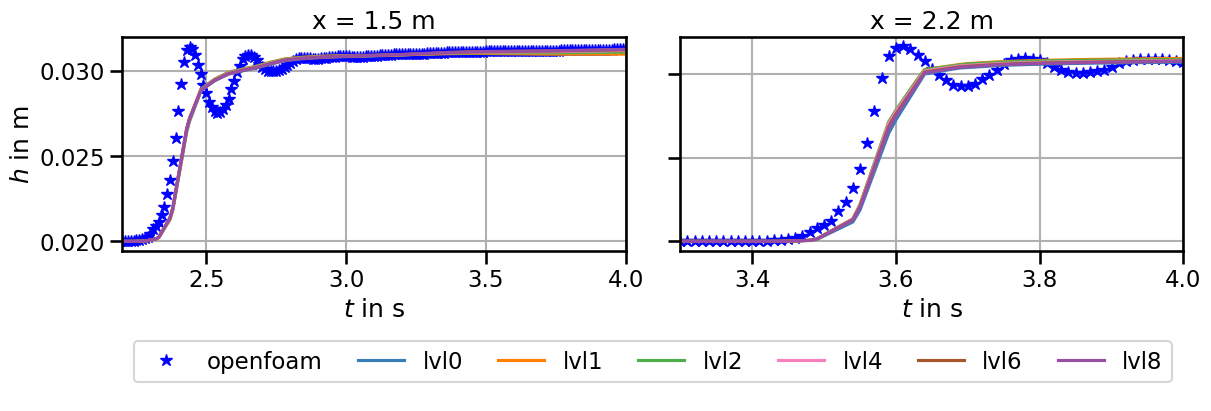

In [126]:
fig = plt.figure(constrained_layout=True, figsize=(12, 4))
ax = fig.subplot_mosaic([[0, 1],['legend', 'legend']], height_ratios = [3.,1.])

def plot_summary(ax, pos, time_end=4.5, i_field=0):
    i_time_0 = ((simulations[f'{pos}']['0']['timeline']-time_end)**2).argmin()
    i_time_1 = ((simulations[f'{pos}']['1']['timeline']-time_end)**2).argmin()
    i_time_2 = ((simulations[f'{pos}']['2']['timeline']-time_end)**2).argmin()
    i_time_4 = ((simulations[f'{pos}']['4']['timeline']-time_end)**2).argmin()
    i_time_6 = ((simulations[f'{pos}']['6']['timeline']-time_end)**2).argmin()
    i_time_8 = ((simulations[f'{pos}']['8']['timeline']-time_end)**2).argmin()
    i_time_of = ((experiments[f'{pos}']['timeline']-time_end)**2).argmin()
    h_of = experiments[f'{pos}']['h'][:i_time_of]
    ax.plot(experiments[f'{pos}']['timeline'][:i_time_of], experiments[f'{pos}']['h'][:i_time_of], 'b*', label='openfoam')
    ax.plot(simulations[f'{pos}']['0']['timeline'][:i_time_0], simulations[f'{pos}']['0']['Q'][:i_time_0, i_field], label='lvl0')
    ax.plot(simulations[f'{pos}']['1']['timeline'][:i_time_1], simulations[f'{pos}']['1']['Q'][:i_time_1, i_field], label='lvl1')
    ax.plot(simulations[f'{pos}']['2']['timeline'][:i_time_2], simulations[f'{pos}']['2']['Q'][:i_time_2, i_field], label='lvl2')
    ax.plot(simulations[f'{pos}']['4']['timeline'][:i_time_4], simulations[f'{pos}']['4']['Q'][:i_time_4, i_field], label='lvl4')
    ax.plot(simulations[f'{pos}']['6']['timeline'][:i_time_6], simulations[f'{pos}']['6']['Q'][:i_time_6, i_field], label='lvl6')
    ax.plot(simulations[f'{pos}']['8']['timeline'][:i_time_8], simulations[f'{pos}']['8']['Q'][:i_time_8, i_field], label='lvl8')

    # ax.plot(simulations[f'{pos}']['0']['timeline'][:i_time_0], (simulations[f'{pos}']['0']['Q'][:i_time_0, i_field] - h_of)/h_of, label='lvl0 (SWE)')
    # ax.plot(simulations[f'{pos}']['1']['timeline'][:i_time_1], (simulations[f'{pos}']['1']['Q'][:i_time_1, i_field] - h_of)/h_of, label='lvl1')
    # ax.plot(simulations[f'{pos}']['2']['timeline'][:i_time_2], (simulations[f'{pos}']['2']['Q'][:i_time_2, i_field] - h_of)/h_of, label='lvl2')
    # ax.plot(simulations[f'{pos}']['4']['timeline'][:i_time_4], (simulations[f'{pos}']['4']['Q'][:i_time_4, i_field] - h_of)/h_of, label='lvl4')
    # ax.plot(simulations[f'{pos}']['6']['timeline'][:i_time_6], (simulations[f'{pos}']['6']['Q'][:i_time_6, i_field] - h_of)/h_of, label='lvl6')
    # ax.plot(simulations[f'{pos}']['8']['timeline'][:i_time_8], (simulations[f'{pos}']['8']['Q'][:i_time_8, i_field] - h_of)/h_of, label='lvl8')
    ax.set_title(f"x = {pos} m")
    ax.grid(True)
    # plt.legend()
    ax.set_xlabel('$t$ in s')
ax[0].set_xlim(2.2, 4.0)
ax[1].set_xlim(3.3, 4.0)

plot_summary(ax[0], 1.5)
plot_summary(ax[1], 2.2)

ax[0].set_ylabel('$h$ in m')
# ax[1].legend()

ax[0].grid(True)
ax[1].grid(True)
ax["legend"].axis("off")

# ax[1].sharex(ax[3])
# ax[0].sharex(ax[2])
ax[1].set_yticklabels([])
# ax[3].set_yticklabels([])

handles, labels = ax[0].get_legend_handles_labels()
ax["legend"].legend(handles, labels, ncol=7, mode="expand")
# ax["legend"].get_legend().set_title("level")
fig.savefig(os.path.join(main_dir, 'docs/problems/images_new/summary.png'))


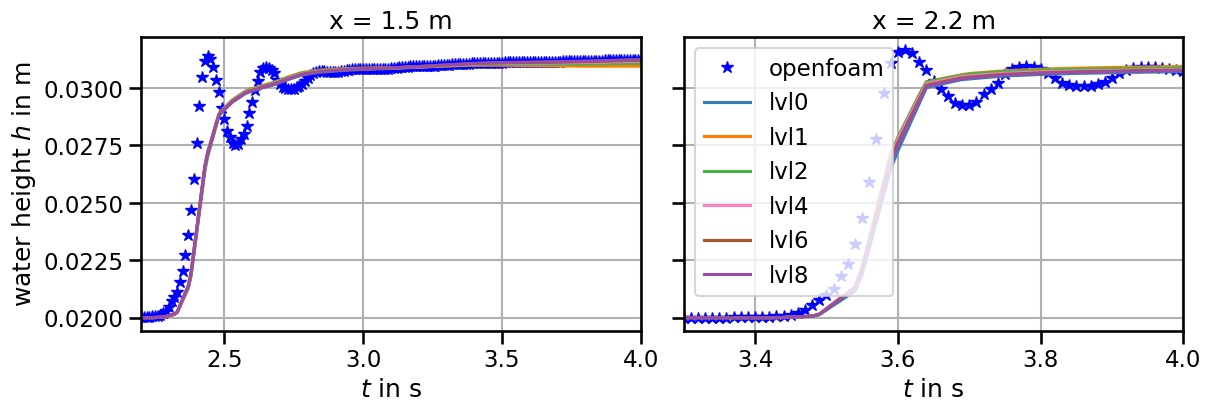

In [106]:

# ### summary
pos = 2.2
fig, ax = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4), sharey=True)

def plot_summary(ax, pos, time_end=4.5, i_field=0):
    i_time_0 = ((simulations[f'{pos}']['0']['timeline']-time_end)**2).argmin()
    i_time_1 = ((simulations[f'{pos}']['1']['timeline']-time_end)**2).argmin()
    i_time_2 = ((simulations[f'{pos}']['2']['timeline']-time_end)**2).argmin()
    i_time_4 = ((simulations[f'{pos}']['4']['timeline']-time_end)**2).argmin()
    i_time_6 = ((simulations[f'{pos}']['6']['timeline']-time_end)**2).argmin()
    i_time_8 = ((simulations[f'{pos}']['8']['timeline']-time_end)**2).argmin()
    i_time_of = ((experiments[f'{pos}']['timeline']-time_end)**2).argmin()
    h_of = experiments[f'{pos}']['h'][:i_time_of]
    ax.plot(experiments[f'{pos}']['timeline'][:i_time_of], experiments[f'{pos}']['h'][:i_time_of], 'b*', label='openfoam')
    ax.plot(simulations[f'{pos}']['0']['timeline'][:i_time_0], simulations[f'{pos}']['0']['Q'][:i_time_0, i_field], label='lvl0')
    ax.plot(simulations[f'{pos}']['1']['timeline'][:i_time_1], simulations[f'{pos}']['1']['Q'][:i_time_1, i_field], label='lvl1')
    ax.plot(simulations[f'{pos}']['2']['timeline'][:i_time_2], simulations[f'{pos}']['2']['Q'][:i_time_2, i_field], label='lvl2')
    ax.plot(simulations[f'{pos}']['4']['timeline'][:i_time_4], simulations[f'{pos}']['4']['Q'][:i_time_4, i_field], label='lvl4')
    ax.plot(simulations[f'{pos}']['6']['timeline'][:i_time_6], simulations[f'{pos}']['6']['Q'][:i_time_6, i_field], label='lvl6')
    ax.plot(simulations[f'{pos}']['8']['timeline'][:i_time_8], simulations[f'{pos}']['8']['Q'][:i_time_8, i_field], label='lvl8')

    # ax.plot(simulations[f'{pos}']['0']['timeline'][:i_time_0], (simulations[f'{pos}']['0']['Q'][:i_time_0, i_field] - h_of)/h_of, label='lvl0 (SWE)')
    # ax.plot(simulations[f'{pos}']['1']['timeline'][:i_time_1], (simulations[f'{pos}']['1']['Q'][:i_time_1, i_field] - h_of)/h_of, label='lvl1')
    # ax.plot(simulations[f'{pos}']['2']['timeline'][:i_time_2], (simulations[f'{pos}']['2']['Q'][:i_time_2, i_field] - h_of)/h_of, label='lvl2')
    # ax.plot(simulations[f'{pos}']['4']['timeline'][:i_time_4], (simulations[f'{pos}']['4']['Q'][:i_time_4, i_field] - h_of)/h_of, label='lvl4')
    # ax.plot(simulations[f'{pos}']['6']['timeline'][:i_time_6], (simulations[f'{pos}']['6']['Q'][:i_time_6, i_field] - h_of)/h_of, label='lvl6')
    # ax.plot(simulations[f'{pos}']['8']['timeline'][:i_time_8], (simulations[f'{pos}']['8']['Q'][:i_time_8, i_field] - h_of)/h_of, label='lvl8')
    ax.set_title(f"x = {pos} m")
    ax.grid(True)
    # plt.legend()
    ax.set_xlabel('$t$ in s')
ax[0].set_xlim(2.2, 4.0)
ax[1].set_xlim(3.3, 4.0)

plot_summary(ax[0], 1.5)
plot_summary(ax[1], 2.2)
ax[0].set_ylabel('water height $h$ in m')
ax[1].legend()
fig.savefig(os.path.join(main_dir, 'docs/problems/images_new/summary.png'))

In [ ]:

# ### shear plot
fig, ax = plt.subplots()
ax.plot(experiments['0.75']['timeline'], experiments['0.75']['shear'], 'b*', label='openfoam')
# ax.plot(simulations['0.75']['1']['timeline'], simulations['0.75']['1']['shear'], label='lvl1')
# ax.plot(simulations['0.75']['2']['timeline'], simulations['0.75']['2']['shear'], label='lvl4')
# ax.plot(simulations['0.75']['4']['timeline'], simulations['0.75']['4']['shear'], label='lvl4')
# ax.plot(simulations['0.75']['5']['timeline'], simulations['0.75']['5']['shear'], label='lvl5')
# ax.plot(simulations['0.75']['6']['timeline'], simulations['0.75']['6']['shear'], label='lvl6')
ax.plot(simulations['0.75']['8']['timeline'], 10*simulations['0.75']['8']['shear'], label='lvl8')
# ax.plot(simulations['0.75']['5']['timeline'], simulations['0.75']['5']['shear_fd_05'], label='fd_05')
# ax.plot(simulations['0.75']['5']['timeline'], simulations['0.75']['5']['shear_fd_01'], label='fd_01')
# ax.plot(simulations['0.75']['8']['timeline'], simulations['0.75']['8']['shear_fd_05'], label='fd_05')
# ax.plot(simulations['0.75']['5']['timeline'], simulations['0.75']['5']['shear_fd_1'], label='fd_1')
ax.plot(simulations['0.75']['0']['timeline'], 0.0035*simulations['0.75']['0']['shear_fd_001'], label='fd_lvl0')
ax.plot(simulations['0.75']['5']['timeline'], 0.007*simulations['0.75']['5']['shear_fd_001'], label='fd_lvl5')
ax.plot(simulations['0.75']['8']['timeline'], 0.007*simulations['0.75']['8']['shear_fd_001'], label='fd_lvl8')
plt.suptitle(f"shear at x = {0.75}")
plt.legend()
ax.set_xlabel('$t$')
ax.set_ylabel('$ \\frac{\partial u}{\partial z} $')
# fig.savefig(os.path.join(main_dir, 'docs/problems/images_new/shear_75.png'))

In [ ]:
fig, ax = plt.subplots()
time = 1.5
z = np.linspace(0, 1, 100)
u_OF = experiments['0.75']['u']
timeline_OF = experiments['0.75']['timeline']
it_OF = ((timeline_OF-time)**2).argmin()

ax.plot(u_OF[it_OF], z, 'b*', label='openfoam')
errors['0.75']['1.5'] = {}

# timeline = simulations['0.75']['0']['timeline']
# Q = simulations['0.75']['0']['Q']
# it = ((timeline-time)**2).argmin()
# h = Q[it][0]
# moments = Q[it][1:] / h
# u_smm = reconstruct_velocity_profile_SMM(moments)
# ax.plot(u_smm, z,  label='lvl0')
# error = np.trapz((u_OF[it_OF] - u_smm)**2, z)
# print('lvl0', error)
# errors['0.75']['1.5']['0'] = error

timeline = simulations['0.75']['1']['timeline']
Q = simulations['0.75']['1']['Q']
it = ((timeline-time)**2).argmin()
h = Q[it][0]
moments = Q[it][1:] / h
u_smm = reconstruct_velocity_profile_SMM(moments)
ax.plot(u_smm, z,  label='lvl1')
error = np.trapz((u_OF[it_OF] - u_smm)**2, z)
print('lvl1', error)
errors['0.75']['1.5']['1'] = error

# timeline = simulations['0.75']['2']['timeline']
# Q = simulations['0.75']['2']['Q']
# it = ((timeline-time)**2).argmin()
# h = Q[it][0]
# moments = Q[it][1:] / h
# u_smm = reconstruct_velocity_profile_SMM(moments)
# ax.plot(u_smm, z,  label='lvl1')
# error = np.trapz((u_OF[it_OF] - u_smm)**2, z)
# print('lvl2', error)
# errors['0.75']['1.5']['2'] = error

# timeline = simulations['0.75']['3']['timeline']
# Q = simulations['0.75']['3']['Q']
# it = ((timeline-time)**2).argmin()
# h = Q[it][0]
# moments = Q[it][1:] / h
# u_smm = reconstruct_velocity_profile_SMM(moments)
# ax.plot(u_smm, z,  label='lvl3')
# error = np.trapz((u_OF[it_OF] - u_smm)**2, z)
# print('lvl3', error)]
    moments_OF = Q_OF[1:] / h_OF

    ax.plot(u_OF, z, 'b*', label='openfoam')
    ax.plot(u_OF.me
# errors['0.75']['1.5']['3'] = error

# timeline = simulations['0.75']['4']['timeline']
# Q = simulations['0.75']['4']['Q']
# it = ((timeline-time)**2).argmin()
# h = Q[it][0]
# moments = Q[it][1:] / h
# u_smm = reconstruct_velocity_profile_SMM(moments)
# ax.plot(u_smm, z,  label='lvl4')
# error = np.trapz((u_OF[it_OF] - u_smm)**2, z)
# print('lvl4', error)
# errors['0.75']['1.5']['4'] = error

# timeline = simulations['0.75']['5']['timeline']
# Q = simulations['0.75']['5']['Q']
# it = ((timeline-time)**2).argmin()
# h = Q[it][0]
# moments = Q[it][1:] / h
# u_smm = reconstruct_velocity_profile_SMM(moments)
# ax.plot(u_smm, z,  label='lvl5')
# error = np.trapz((u_OF[it_OF] - u_smm)**2, z)
# print('lvl5', error)
# errors['0.75']['1.5']['5'] = error

# timeline = simulations['0.75']['6']['timeline']
# Q = simulations['0.75']['6']['Q']
# it = ((timeline-time)**2).argmin()
# h = Q[it][0]
# moments = Q[it][1:] / h
# u_smm = reconstruct_velocity_profile_SMM(moments)
# ax.plot(u_smm, z,  label='lvl6')
# error = np.trapz((u_OF[it_OF] - u_smm)**2, z)
# print('lvl6', error)
# errors['0.75']['1.5']['6'] = error


# timeline = simulations['0.75']['8']['timeline']
# Q = simulations['0.75']['8']['Q']
# it = ((timeline-time)**2).argmin()
# h = Q[it][0]
# moments = Q[it][1:] / h
# u_smm = reconstruct_velocity_profile_SMM(moments)
# ax.plot(u_smm, z,  label='lvl8')
# error = np.trapz((u_OF[it_OF] - u_smm)**2, z)
# print('lvl8', error)
# errors['0.75']['1.5']['8'] = error

ax.set_xlabel('$u$')
ax.set_ylabel('$z$')
plt.suptitle(f"velocity profile at t={time}, x={0.75}")
plt.legend()
fig.savefig(os.path.join(main_dir, 'docs/problems/images_new/recon_75_15.png'))


In [ ]:
fig, ax = plt.subplots()
time = 2.0
z = np.linspace(0, 1, 100)
u_OF = experiments['0.75']['u']
timeline_OF = experiments['0.75']['timeline']
it_OF = ((timeline_OF-time)**2).argmin()

ax.plot(u_OF[it_OF], z, 'b*', label='openfoam')
errors['0.75']['2.0'] = {}

# timeline = simulations['0.75']['0']['timeline']
# Q = simulations['0.75']['0']['Q']
# it = ((timeline-time)**2).argmin()
# h = Q[it][0]
# moments = Q[it][1:] / h
# u_smm = reconstruct_velocity_profile_SMM(moments)
# ax.plot(u_smm, z,  label='lvl0')
# error = np.trapz((u_OF[it_OF] - u_smm)**2, z)
# print('lvl0', error)
# errors['0.75']['2.0']['0'] = error

# timeline = simulations['0.75']['2']['timeline']
# Q = simulations['0.75']['2']['Q']
# it = ((timeline-time)**2).argmin()
# h = Q[it][0]
# moments = Q[it][1:] / h
# u_smm = reconstruct_velocity_profile_SMM(moments)
# ax.plot(u_smm, z,  label='lvl1')
# error = np.trapz((u_OF[it_OF] - u_smm)**2, z)
# print('lvl2', error)
# errors['0.75']['2.0']['2'] = error

timeline = simulations['0.75']['1']['timeline']
Q = simulations['0.75']['1']['Q']
it = ((timeline-time)**2).argmin()
h = Q[it][0]
moments = Q[it][1:] / h
u_smm = reconstruct_velocity_profile_SMM(moments)
ax.plot(u_smm, z,  label='lvl1')
error = np.trapz((u_OF[it_OF] - u_smm)**2, z)
print('lvl1', error)
errors['0.75']['2.0']['1'] = error


# timeline = simulations['0.75']['8']['timeline']
# Q = simulations['0.75']['8']['Q']
# it = ((timeline-time)**2).argmin()
# h = Q[it][0]
# moments = Q[it][1:] / h
# u_smm = reconstruct_velocity_profile_SMM(moments)
# ax.plot(u_smm, z,  label='lvl8')
# error = np.trapz((u_OF[it_OF] - u_smm)**2, z)
# print('lvl8', error)
# errors['0.75']['2.0']['8'] = error


ax.set_xlabel('$u$')
ax.set_ylabel('$z$')
plt.suptitle(f"velocity profile at t={time}, x={0.75}")
fig.savefig(os.path.join(main_dir, 'docs/problems/images_new/recon_75_20.png'))


In [ ]:
fig, ax = plt.subplots()
time = 2.5
z = np.linspace(0, 1, 100)
u_OF = experiments['0.75']['u']
timeline_OF = experiments['0.75']['timeline']
it_OF = ((timeline_OF-time)**2).argmin()

ax.plot(u_OF[it_OF], z, 'b*', label='openfoam')
errors['0.75']['2.5'] = {}

# timeline = simulations['0.75']['0']['timeline']
# Q = simulations['0.75']['0']['Q']
# it = ((timeline-time)**2).argmin()
# h = Q[it][0]
# moments = Q[it][1:] / h
# u_smm = reconstruct_velocity_profile_SMM(moments)
# ax.plot(u_smm, z,  label='lvl0')
# error = np.trapz((u_OF[it_OF] - u_smm)**2, z)
# print('lvl0', error)
# errors['0.75']['2.5']['0'] = error

timeline = simulations['0.75']['1']['timeline']
Q = simulations['0.75']['1']['Q']
it = ((timeline-time)**2).argmin()
h = Q[it][0]
moments = Q[it][1:] / h
u_smm = reconstruct_velocity_profile_SMM(moments)
ax.plot(u_smm, z,  label='lvl1')
error = np.trapz((u_OF[it_OF] - u_smm)**2, z)
print('lvl1', error)
errors['0.75']['2.5']['1'] = error

# timeline = simulations['0.75']['2']['timeline']
# Q = simulations['0.75']['2']['Q']
# it = ((timeline-time)**2).argmin()
# h = Q[it][0]
# moments = Q[it][1:] / h
# u_smm = reconstruct_velocity_profile_SMM(moments)
# ax.plot(u_smm, z,  label='lvl1')
# error = np.trapz((u_OF[it_OF] - u_smm)**2, z)
# print('lvl2', error)
# errors['0.75']['2.5']['2'] = error


# timeline = simulations['0.75']['8']['timeline']
# Q = simulations['0.75']['8']['Q']
# it = ((timeline-time)**2).argmin()
# h = Q[it][0]
# moments = Q[it][1:] / h
# u_smm = reconstruct_velocity_profile_SMM(moments)
# ax.plot(u_smm, z,  label='lvl8')
# error = np.trapz((u_OF[it_OF] - u_smm)**2, z)
# print('lvl8', error)
# errors['0.75']['2.5']['8'] = error

ax.set_xlabel('$u$')
ax.set_ylabel('$z$')
plt.suptitle(f"velocity profile at t={time}, x={0.75}")
fig.savefig(os.path.join(main_dir, 'docs/problems/images_new/recon_75_25.png'))


In [ ]:
fig, ax = plt.subplots()
time = 3.0
z = np.linspace(0, 1, 100)
u_OF = experiments['0.9']['u']
timeline_OF = experiments['0.9']['timeline']
it_OF = ((timeline_OF-time)**2).argmin()

ax.plot(u_OF[it_OF], z, 'b*', label='openfoam')
errors['0.9']['3.0'] = {}

# timeline = simulations['0.9']['0']['timeline']
# Q = simulations['0.9']['0']['Q']
# it = ((timeline-time)**2).argmin()
# h = Q[it][0]
# moments = Q[it][1:] / h
# u_smm = reconstruct_velocity_profile_SMM(moments)
# ax.plot(u_smm, z,  label='lvl0')
# error = np.trapz((u_OF[it_OF] - u_smm)**2, z)
# print('lvl0', error)
# errors['0.9']['3.0']['0'] = error

timeline = simulations['0.75']['2']['timeline']
Q = simulations['0.75']['2']['Q']
it = ((timeline-time)**2).argmin()
h = Q[it][0]
moments = Q[it][1:] / h
u_smm = reconstruct_velocity_profile_SMM(moments)
ax.plot(u_smm, z,  label='lvl1')
error = np.trapz((u_OF[it_OF] - u_smm)**2, z)
print('lvl2', error)
errors['0.9']['3.0']['2'] = error


# timeline = simulations['0.9']['4']['timeline']
# Q = simulations['0.9']['4']['Q']
# it = ((timeline-time)**2).argmin()
# h = Q[it][0]
# moments = Q[it][1:] / h
# u_smm = reconstruct_velocity_profile_SMM(moments)
# ax.plot(u_smm, z,  label='lvl4')
# error = np.trapz((u_OF[it_OF] - u_smm)**2, z)
# print('lvl1', error)
# errors['0.9']['3.0']['1'] = error

# timeline = simulations['0.9']['8']['timeline']
# Q = simulations['0.9']['8']['Q']
# it = ((timeline-time)**2).argmin()
# h = Q[it][0]
# moments = Q[it][1:] / h
# u_smm = reconstruct_velocity_profile_SMM(moments)
# ax.plot(u_smm, z,  label='lvl8')
# error = np.trapz((u_OF[it_OF] - u_smm)**2, z)
# print('lvl8', error)
# errors['0.9']['3.0']['8'] = error


ax.set_xlabel('$u$')
ax.set_ylabel('$z$')
plt.suptitle(f"velocity profile at t={time}, x={0.9}")
fig.savefig(os.path.join(main_dir, 'docs/problems/images_new/recon_90_3.png'))


In [ ]:


# ### compute errors

# ### timeline summary
fig, ax = create_timeline_summary()
# add_timeline_summary(ax, experiments['0.75'], 'openfoam')
# add_timeline_summary(ax, simulations['0.75']['8'], 'lvl8')
add_timeline_summary(ax, experiments['1.5'], 'openfoam')
# add_timeline_summary(ax, simulations['1.5']['0'], 'lvl0')
add_timeline_summary(ax, simulations['1.5']['2'], 'lvl0')
plt.legend()
fig.savefig(os.path.join(main_dir, 'docs/problems/images_new/summary.png'))



In [ ]:
simulations['0.75']['8'].keys()

In [ ]:

# ### shear plot
fig, ax = plt.subplots()
ax.plot(experiments['0.75']['timeline'], experiments['0.75']['shear'], 'b*', label='openfoam')
# ax.plot(simulations['0.75']['1']['timeline'], simulations['0.75']['1']['shear'], label='lvl1')
ax.plot(simulations['0.75']['2']['timeline'], simulations['0.75']['2']['shear'], label='lvl4')
# ax.plot(simulations['0.75']['4']['timeline'], simulations['0.75']['4']['shear'], label='lvl4')
ax.plot(simulations['0.75']['5']['timeline'], simulations['0.75']['5']['shear'], label='lvl5')
# ax.plot(simulations['0.75']['6']['timeline'], simulations['0.75']['6']['shear'], label='lvl6')
# ax.plot(simulations['0.75']['8']['timeline'], simulations['0.75']['8']['shear'], label='lvl8')
# ax.plot(simulations['0.75']['5']['timeline'], simulations['0.75']['5']['shear_fd_05'], label='fd_05')
# ax.plot(simulations['0.75']['5']['timeline'], simulations['0.75']['5']['shear_fd_01'], label='fd_01')
# ax.plot(simulations['0.75']['8']['timeline'], simulations['0.75']['8']['shear_fd_05'], label='fd_05')
# ax.plot(simulations['0.75']['5']['timeline'], simulations['0.75']['5']['shear_fd_1'], label='fd_1')
ax.plot(simulations['0.75']['5']['timeline'], simulations['0.75']['5']['shear_fd_15'], label='fd_15')
plt.suptitle(f"shear at x = {0.75}")
plt.legend()
ax.set_xlabel('$t$')
ax.set_ylabel('$ \\frac{\partial u}{\partial z} $')
# fig.savefig(os.path.join(main_dir, 'docs/problems/images_new/shear_75.png'))


In [ ]:

z = np.linspace(0, 1, 100)
u_OF = experiments['0.75']['u']
timeline_OF = experiments['0.75']['timeline']

errors = {}

def compute_error(Q, timeline, u_of):
    u_smm = np.zeros((timeline.shape[0], z.shape[0]))
    error = 0
    for it in range(timeline.shape[0]):
        h = Q[it][0]
        moments = Q[it][1:] / h
        u_smm = reconstruct_velocity_profile_SMM(moments)
        error += np.trapz((u_OF[it] - u_smm)**2, z)
    return error
errors['lvl8'] = compute_error(simulations['0.75']['8']['Q'],  simulations['0.75']['8']['timeline'], u_OF)
# errors['lvl2'] = compute_error(simulations['0.75']['2']['Q'],  simulations['0.75']['2']['timeline'], u_OF)
errors['lvl0'] = compute_error(simulations['0.75']['0']['Q'],  simulations['0.75']['0']['timeline'], u_OF)

print(errors.keys())
print(np.array(list(errors.values()))/float(simulations['0.75']['8']['timeline'].shape[0]))

In [ ]:
u_OF_mean = u_OF.mean(axis=1)
u_smm_8_mean = (simulations['0.75']['8']['Q'][:, 1] / simulations['0.75']['8']['Q'][:, 0])
u_smm_0_mean = (simulations['0.75']['0']['Q'][:, 1] / simulations['0.75']['0']['Q'][:, 0])
fig, ax = plt.subplots()
ax.plot(timeline_OF, u_OF_mean)
ax.plot(timeline_OF, u_smm_8_mean)
ax.plot(timeline_OF, u_smm_0_mean)

In [ ]:

z = np.linspace(0, 1, 100)
u_OF = experiments['0.5']['u']
timeline_OF = experiments['0.5']['timeline']

errors = {}

def compute_error(Q, timeline, u_of):
    u_smm = np.zeros((timeline.shape[0], z.shape[0]))
    error = 0
    for it in range(timeline.shape[0]):
        h = Q[it][0]
        moments = Q[it][1:] / h
        u_smm = reconstruct_velocity_profile_SMM(moments)
        error += np.trapz((u_OF[it] - u_smm)**2, z)
    return error 
errors['lvl8'] = compute_error(simulations['0.5']['8']['Q'],  simulations['0.5']['8']['timeline'], u_OF)
# errors['lvl2'] = compute_error(simulations['0.5']['2']['Q'],  simulations['0.5']['2']['timeline'], u_OF)
errors['lvl0'] = compute_error(simulations['0.5']['0']['Q'],  simulations['0.5']['0']['timeline'], u_OF)

print(errors.keys())
print(np.array(list(errors.values()))/float(simulations['0.5']['8']['timeline'].shape[0]))

In [ ]:
u_OF_mean = u_OF.mean(axis=1)
u_smm_8_mean = (simulations['0.5']['8']['Q'][:, 1] / simulations['0.5']['8']['Q'][:, 0])
u_smm_0_mean = (simulations['0.5']['0']['Q'][:, 1] / simulations['0.5']['0']['Q'][:, 0])
fig, ax = plt.subplots()
ax.plot(timeline_OF, u_OF_mean)
ax.plot(timeline_OF, u_smm_8_mean)
ax.plot(timeline_OF, u_smm_0_mean)

In [ ]:


z = np.linspace(0, 1, 100)
u_OF = experiments['0.9']['u']
timeline_OF = experiments['0.9']['timeline']


In [ ]:

errors = {}

def compute_error(Q, timeline, u_of):
    u_smm = np.zeros((timeline.shape[0], z.shape[0]))
    error = 0
    for it in range(timeline.shape[0]):
        h = Q[it][0]
        moments = Q[it][1:] / h
        u_smm = reconstruct_velocity_profile_SMM(moments)
        error += np.trapz((u_OF[it] - u_smm)**2, z)
    return error 
errors['lvl8'] = compute_error(simulations['0.9']['8']['Q'][100:250],  simulations['0.9']['8']['timeline'][100:250], u_OF[100:250])
# errors['lvl2'] = compute_error(simulations['0.9']['2']['Q'],  simulations['0.9']['2']['timeline'], u_OF)
errors['lvl0'] = compute_error(simulations['0.9']['0']['Q'][100:250],  simulations['0.9']['0']['timeline'][100:250], u_OF[100:250])

print(errors.keys())
print(np.array(list(errors.values()))/float(simulations['0.9']['8']['timeline'].shape[0]))

In [ ]:
u_OF_mean = u_OF.mean(axis=1)
u_smm_8_mean = (simulations['0.9']['8']['Q'][:, 1] / simulations['0.9']['8']['Q'][:, 0])
u_smm_0_mean = (simulations['0.9']['0']['Q'][:, 1] / simulations['0.9']['0']['Q'][:, 0])
fig, ax = plt.subplots()
ax.plot(timeline_OF, u_OF_mean)
ax.plot(timeline_OF, u_smm_8_mean)
ax.plot(timeline_OF, u_smm_0_mean)

In [ ]:


z = np.linspace(0, 1, 100)
u_OF = experiments['1.5']['u']
timeline_OF = experiments['1.5']['timeline']


In [ ]:

errors = {}

def compute_error(Q, timeline, u_of):
    u_smm = np.zeros((timeline.shape[0], z.shape[0]))
    error = 0
    for it in range(timeline.shape[0]):
        h = Q[it][0]
        moments = Q[it][1:] / h
        u_smm = reconstruct_velocity_profile_SMM(moments)
        error += np.trapz((u_OF[it] - u_smm)**2, z)
    return error 
errors['lvl8'] = compute_error(simulations['1.5']['8']['Q'],  simulations['1.5']['8']['timeline'], u_OF)
# errors['lvl2'] = compute_error(simulations['1.5']['2']['Q'],  simulations['1.5']['2']['timeline'], u_OF)
errors['lvl0'] = compute_error(simulations['1.5']['0']['Q'],  simulations['1.5']['0']['timeline'], u_OF)

print(errors.keys())
print(np.array(list(errors.values()))/float(simulations['1.5']['8']['timeline'].shape[0]))

In [ ]:
u_OF_mean = u_OF.mean(axis=1)
u_smm_8_mean = (simulations['1.5']['8']['Q'][:, 1] / simulations['1.5']['8']['Q'][:, 0])
u_smm_0_mean = (simulations['1.5']['0']['Q'][:, 1] / simulations['1.5']['0']['Q'][:, 0])
fig, ax = plt.subplots()
ax.plot(timeline_OF, u_OF_mean)
ax.plot(timeline_OF, u_smm_8_mean)
ax.plot(timeline_OF, u_smm_0_mean)

In [ ]:


z = np.linspace(0, 1, 100)
u_OF = experiments['2.2']['u']
timeline_OF = experiments['2.2']['timeline']


In [ ]:

errors = {}

def compute_error(Q, timeline, u_of):
    u_smm = np.zeros((timeline.shape[0], z.shape[0]))
    error = 0
    for it in range(timeline.shape[0]):
        h = Q[it][0]
        moments = Q[it][1:] / h
        u_smm = reconstruct_velocity_profile_SMM(moments)
        error += np.trapz((u_OF[it] - u_smm)**2, z)
    return error 
errors['lvl8'] = compute_error(simulations['2.2']['8']['Q'],  simulations['2.2']['8']['timeline'], u_OF)
# errors['lvl2'] = compute_error(simulations['2.2']['2']['Q'],  simulations['2.2']['2']['timeline'], u_OF)
errors['lvl0'] = compute_error(simulations['2.2']['0']['Q'],  simulations['2.2']['0']['timeline'], u_OF)

print(errors.keys())
print(np.array(list(errors.values()))/float(simulations['2.2']['8']['timeline'].shape[0]))

In [ ]:
u_OF_mean = u_OF.mean(axis=1)
u_smm_8_mean = (simulations['2.2']['8']['Q'][:, 1] / simulations['2.2']['8']['Q'][:, 0])
u_smm_0_mean = (simulations['2.2']['0']['Q'][:, 1] / simulations['2.2']['0']['Q'][:, 0])
fig, ax = plt.subplots()
ax.plot(timeline_OF, u_OF_mean)
ax.plot(timeline_OF, u_smm_8_mean)
ax.plot(timeline_OF, u_smm_0_mean)